2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
#Importing EDA ana Data Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression Model Building Libraries
import statsmodels.formula.api as smf

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting Figure Parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

Importing Dataset and doing Basic EDA and Visualization

In [3]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#Checking for NULL Values
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

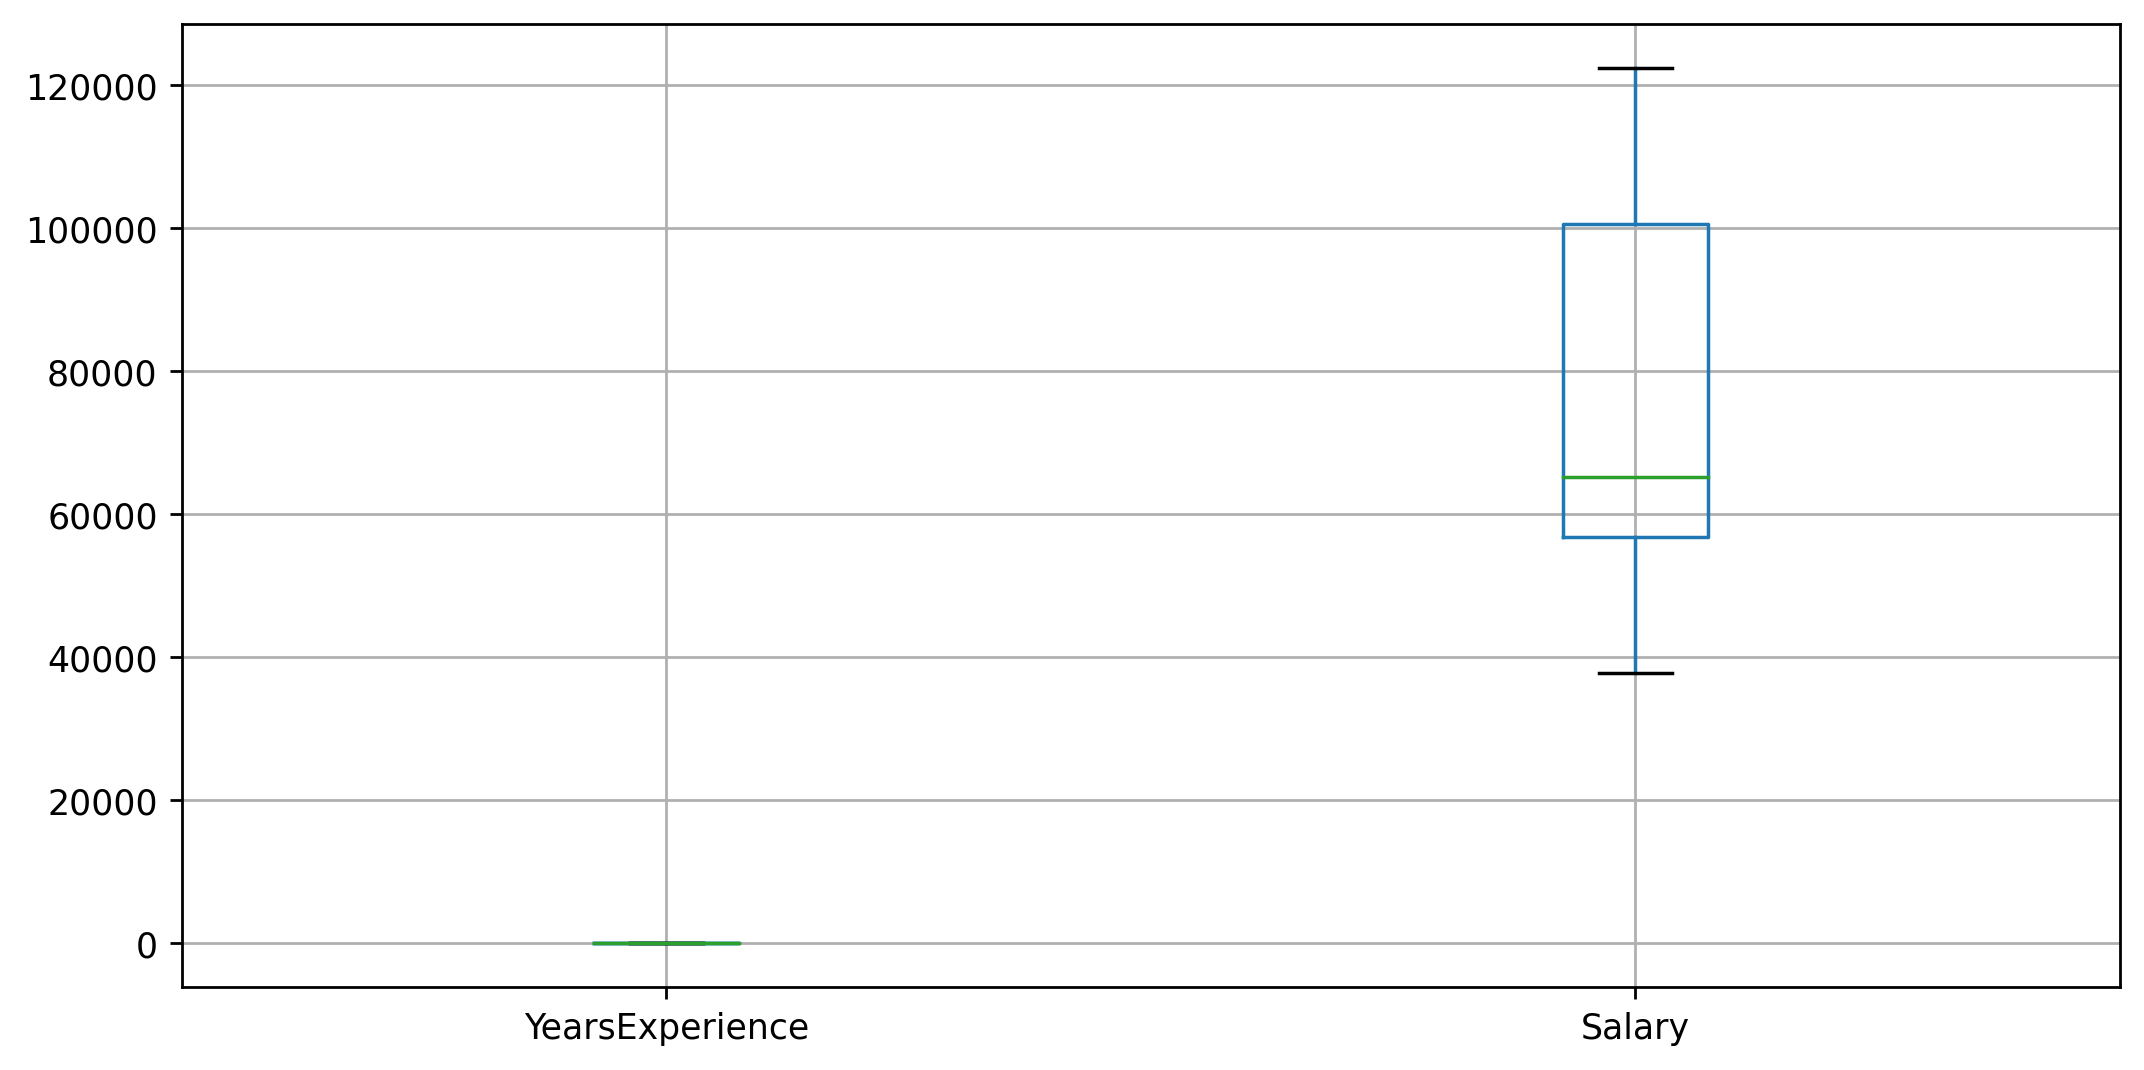

In [6]:
df.boxplot()

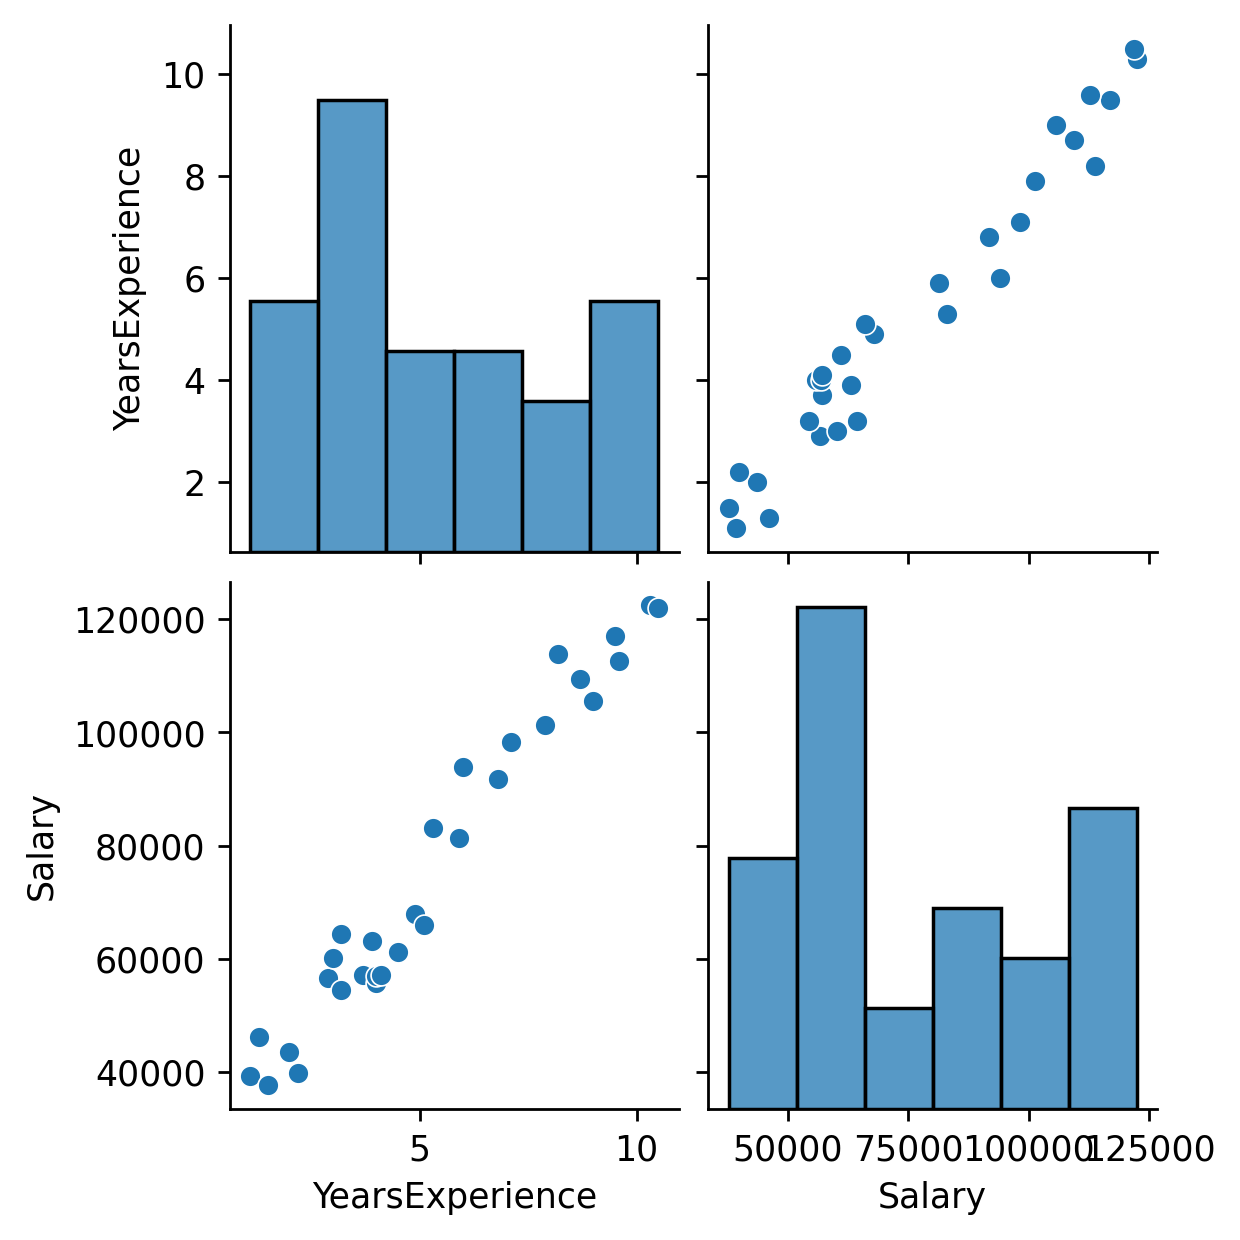

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

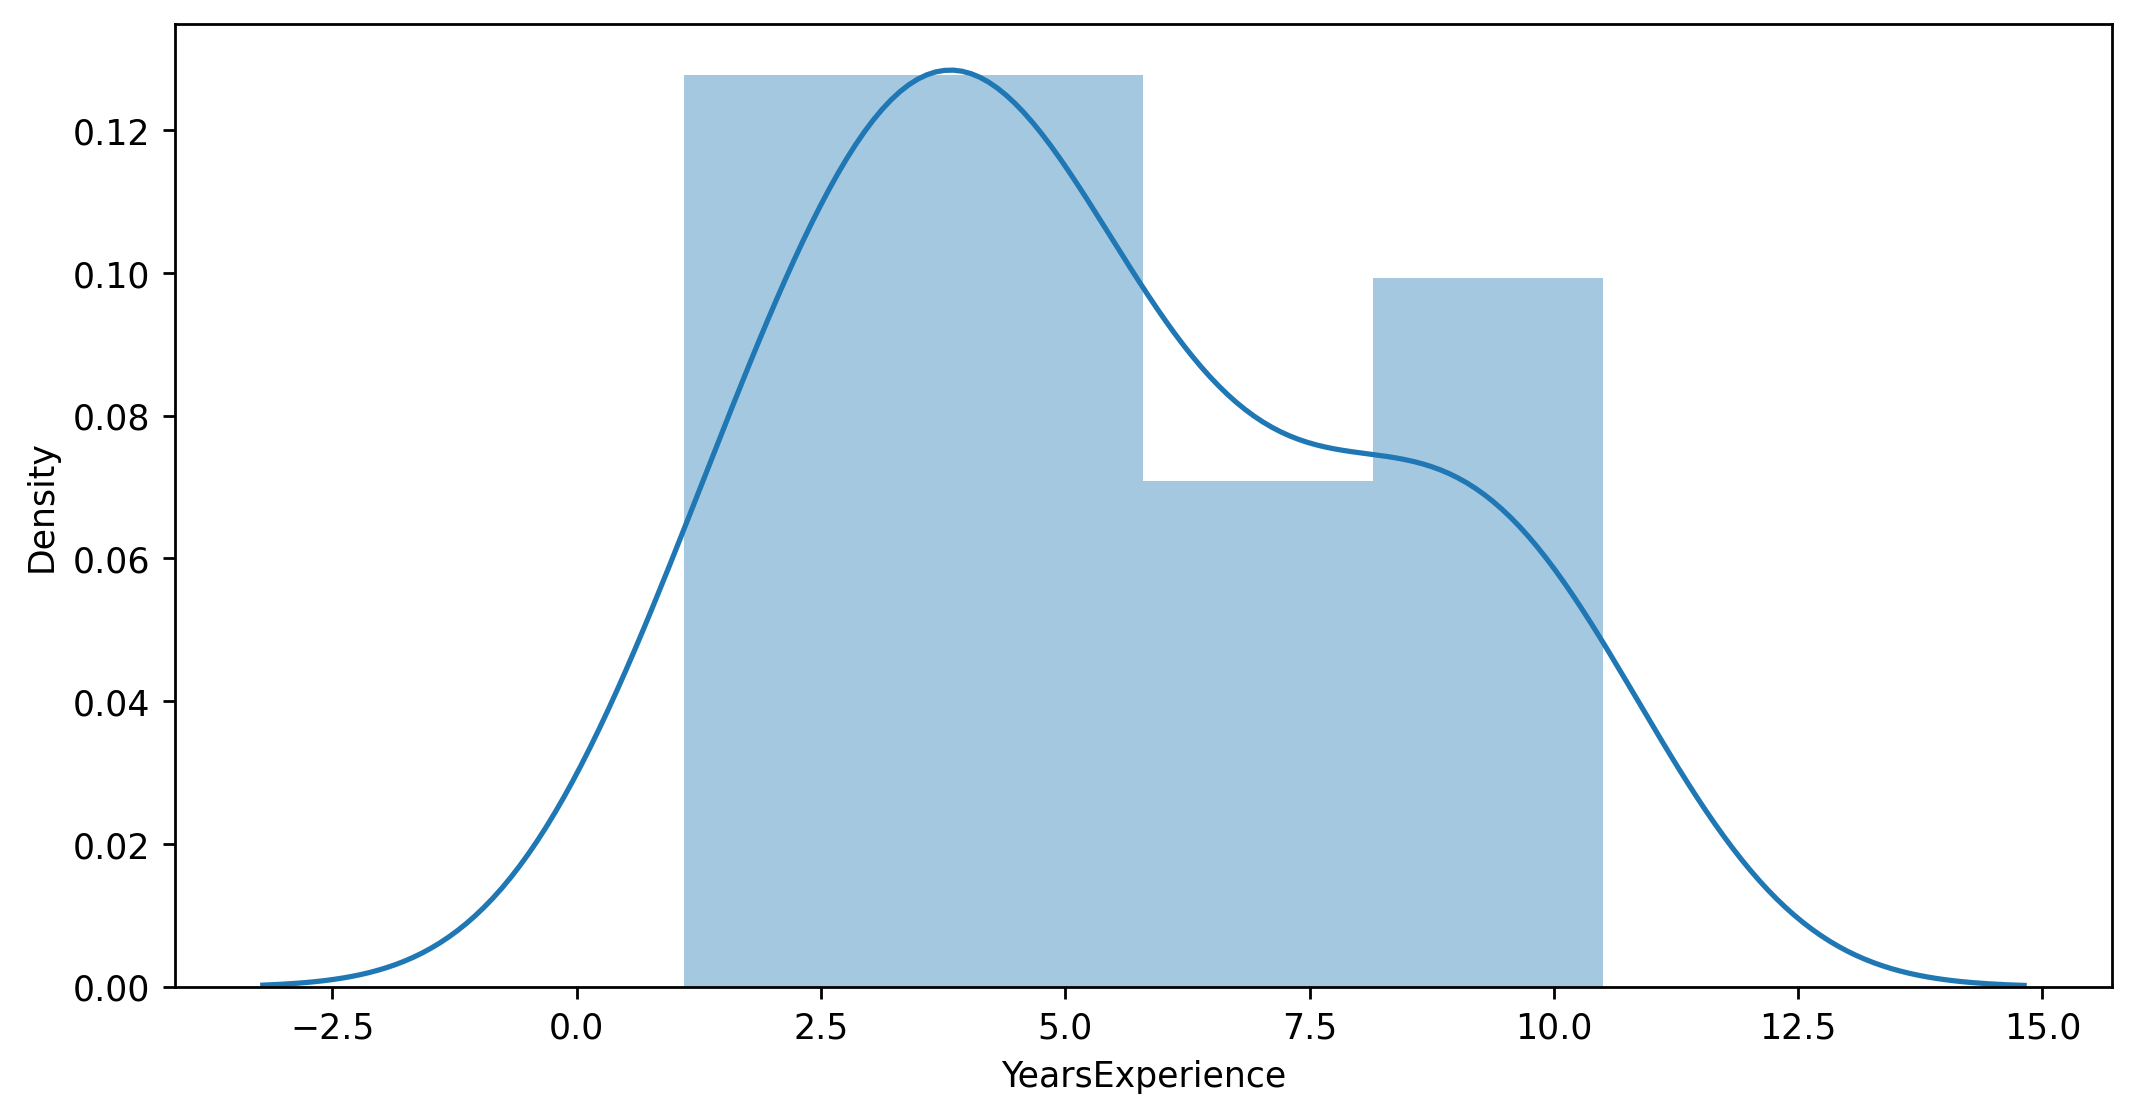

In [8]:
#Understanding Skewness of Dataset using Distplot and skew() function
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

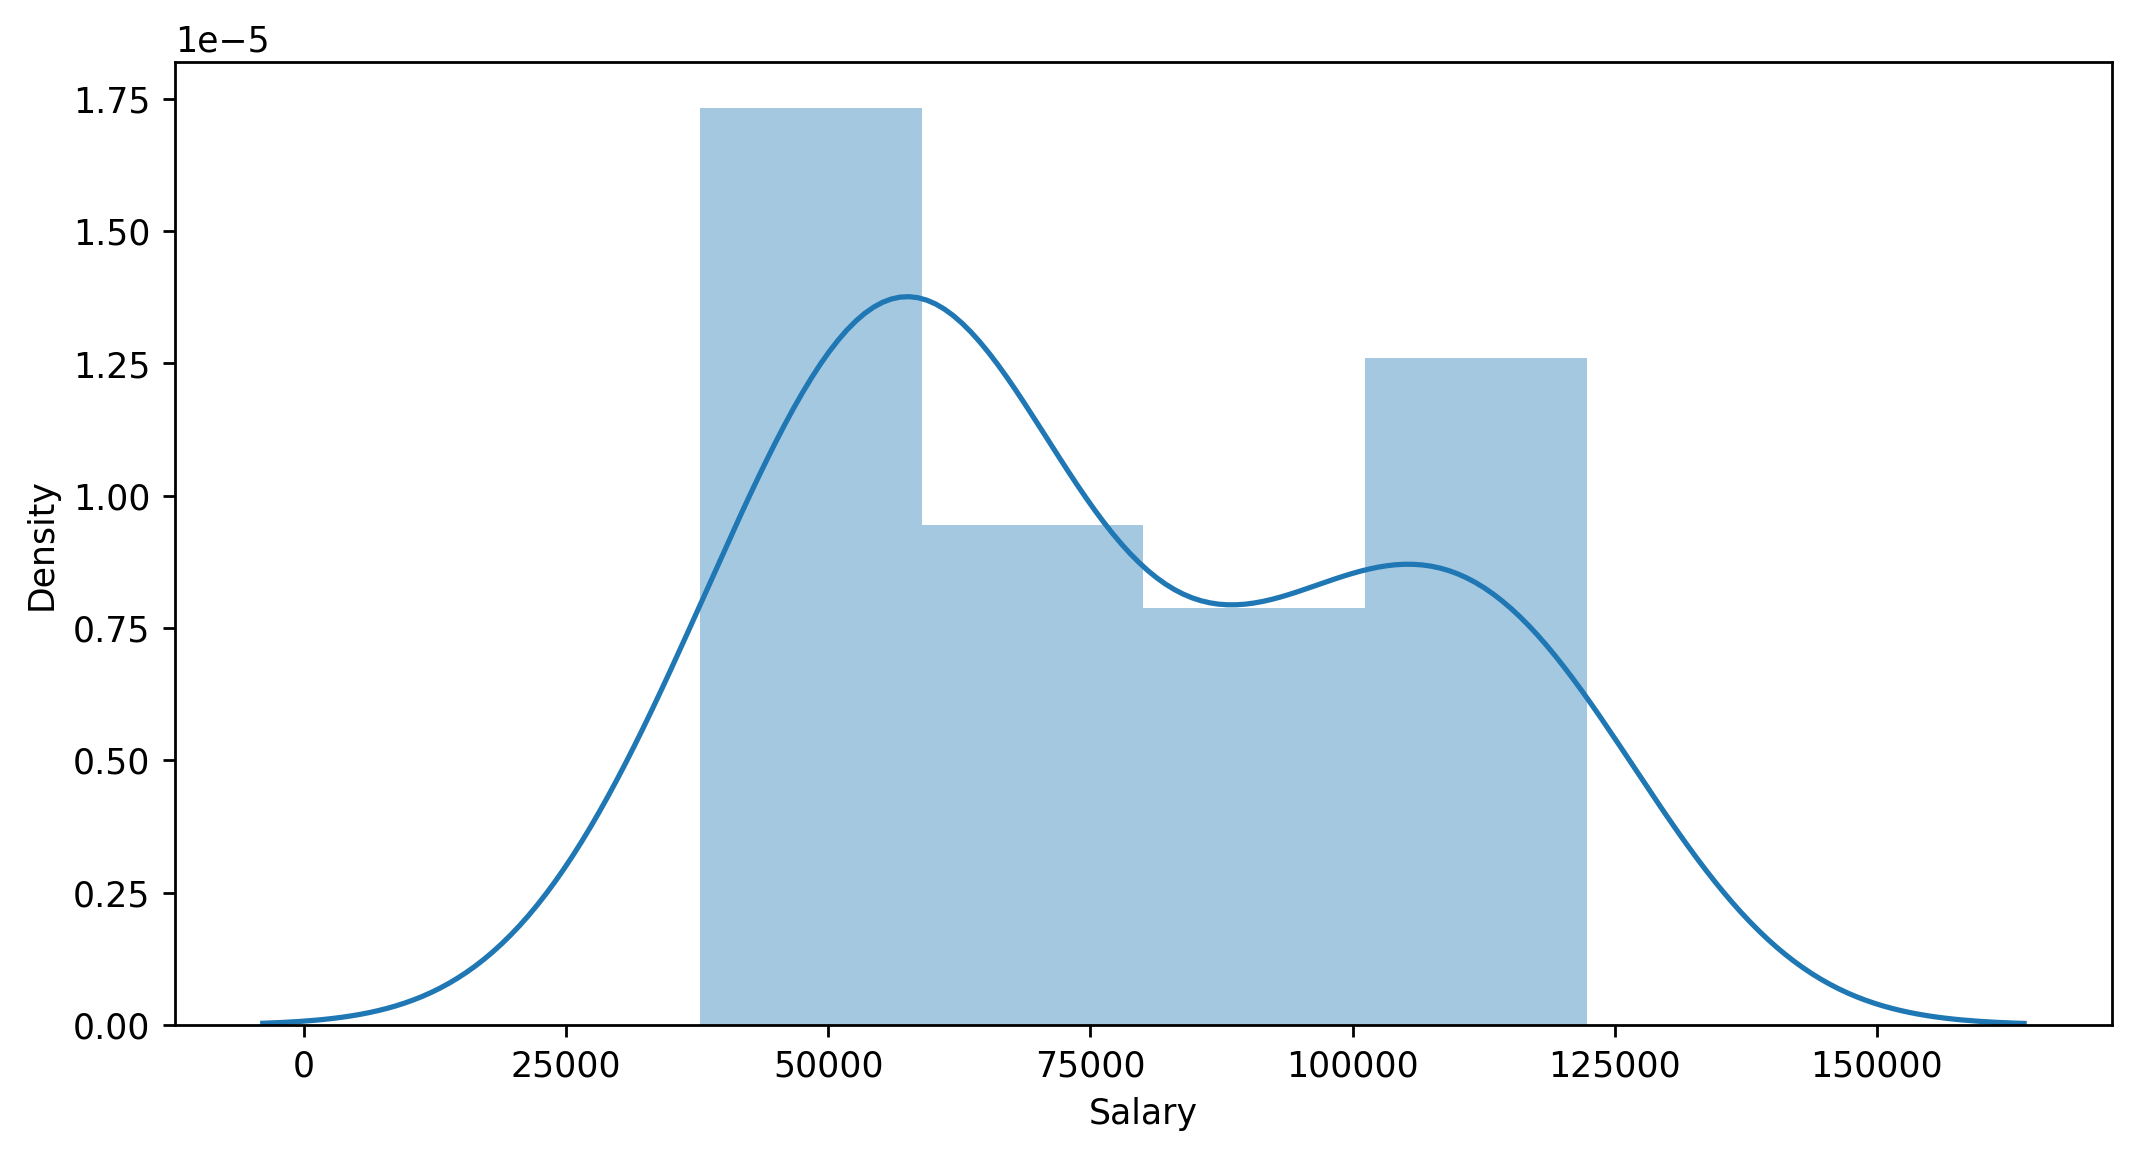

In [9]:
sns.distplot(df['Salary'])

In [10]:
df['YearsExperience'].skew()

0.37956024064804106

In [11]:
df['Salary'].skew()

0.35411967922959153

In [12]:
#Checking for correlation values of the columns for building regression model
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

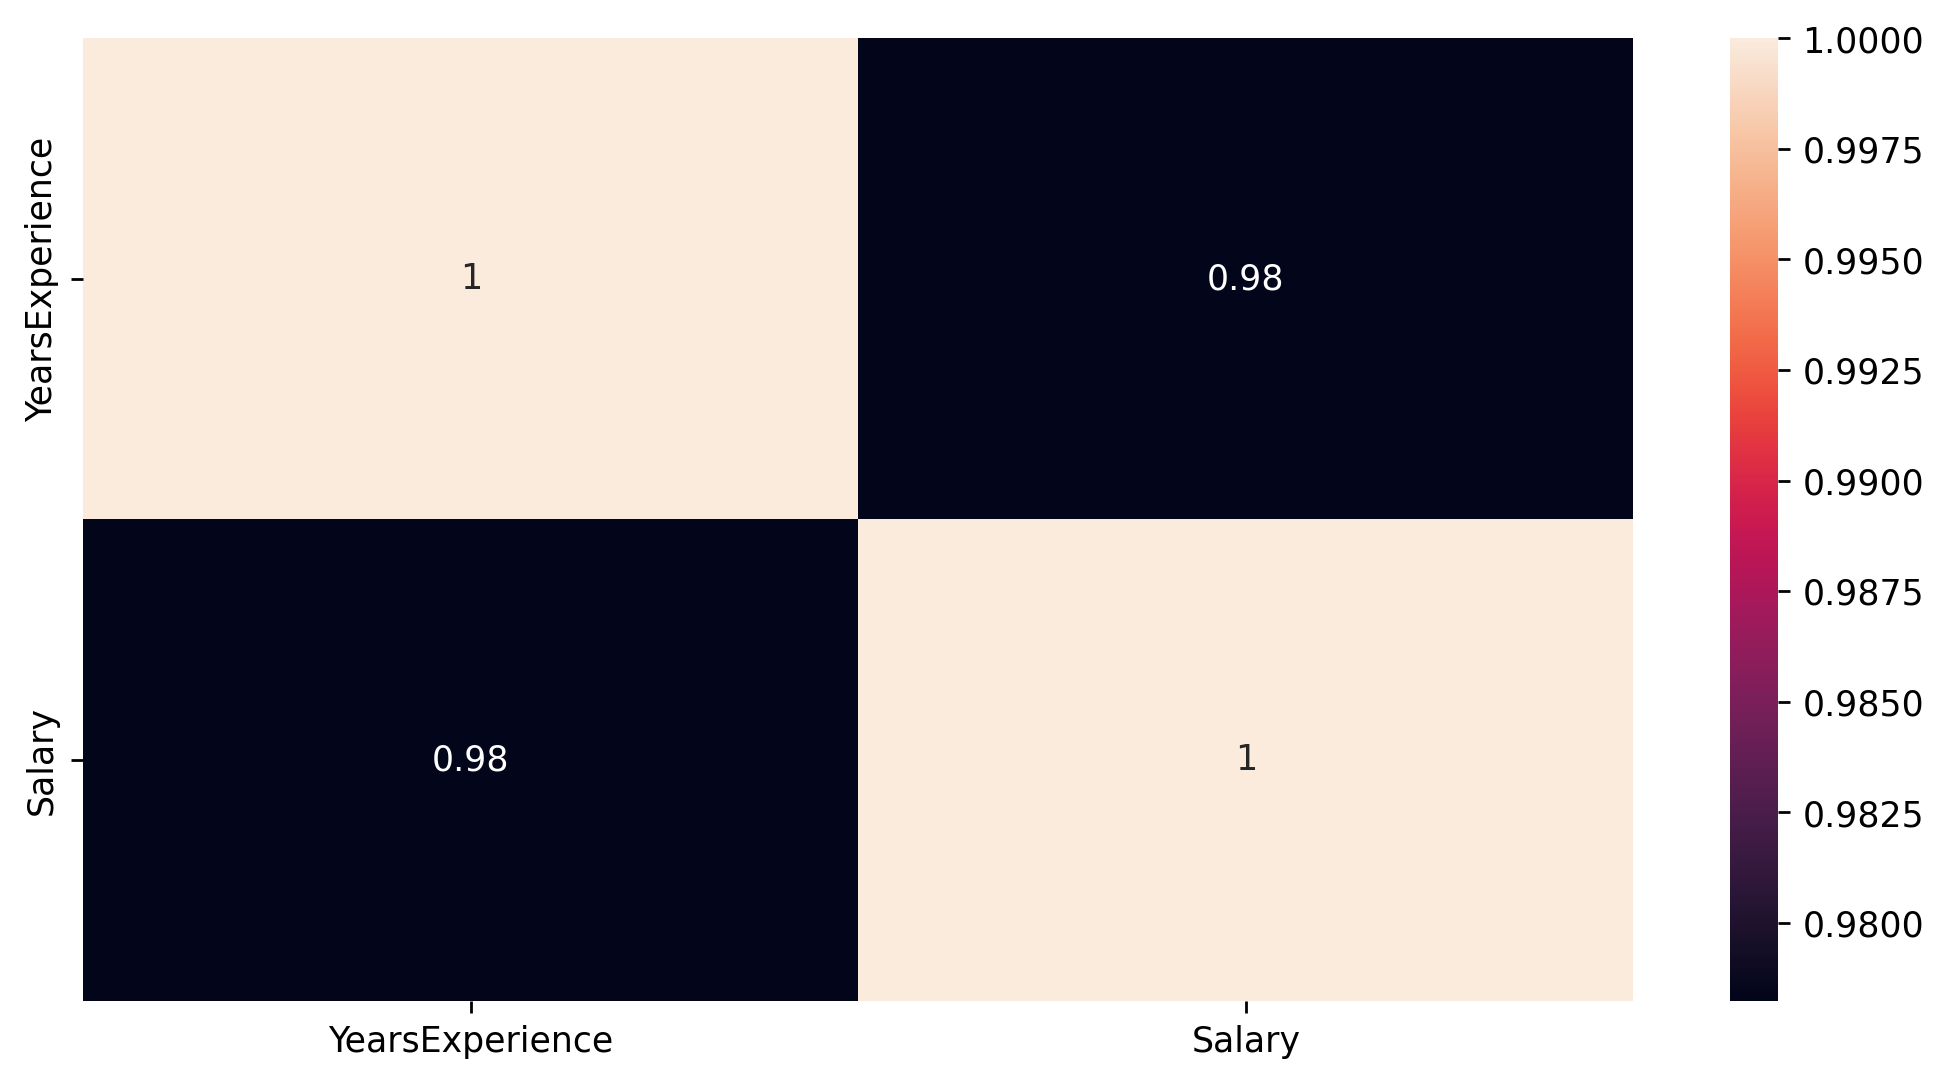

In [13]:
sns.heatmap(df.corr(), annot=True)

# Model Building
Simple Linear Regression Model as 1 independent column and 1 target column.

From problem statement we understand that we have to predict salary hike.

Therefore, Salary would be our target column and other columns will be our Independent columns

In [14]:
model = smf.ols('Salary~YearsExperience', data=df).fit()

In [15]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
model.rsquared

0.9569566641435086

We can increase the accuracy of the Model using different Transformation.

There are two data Transformation techniques available; log transformation, square root transformation. 
Both of them works fine but log transformation works slightly better than the square root transformation.

Therefore we use log based transformation on our complete dataset.

In [19]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df['log_Salary'] = np.log(df['Salary'])

In [20]:
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

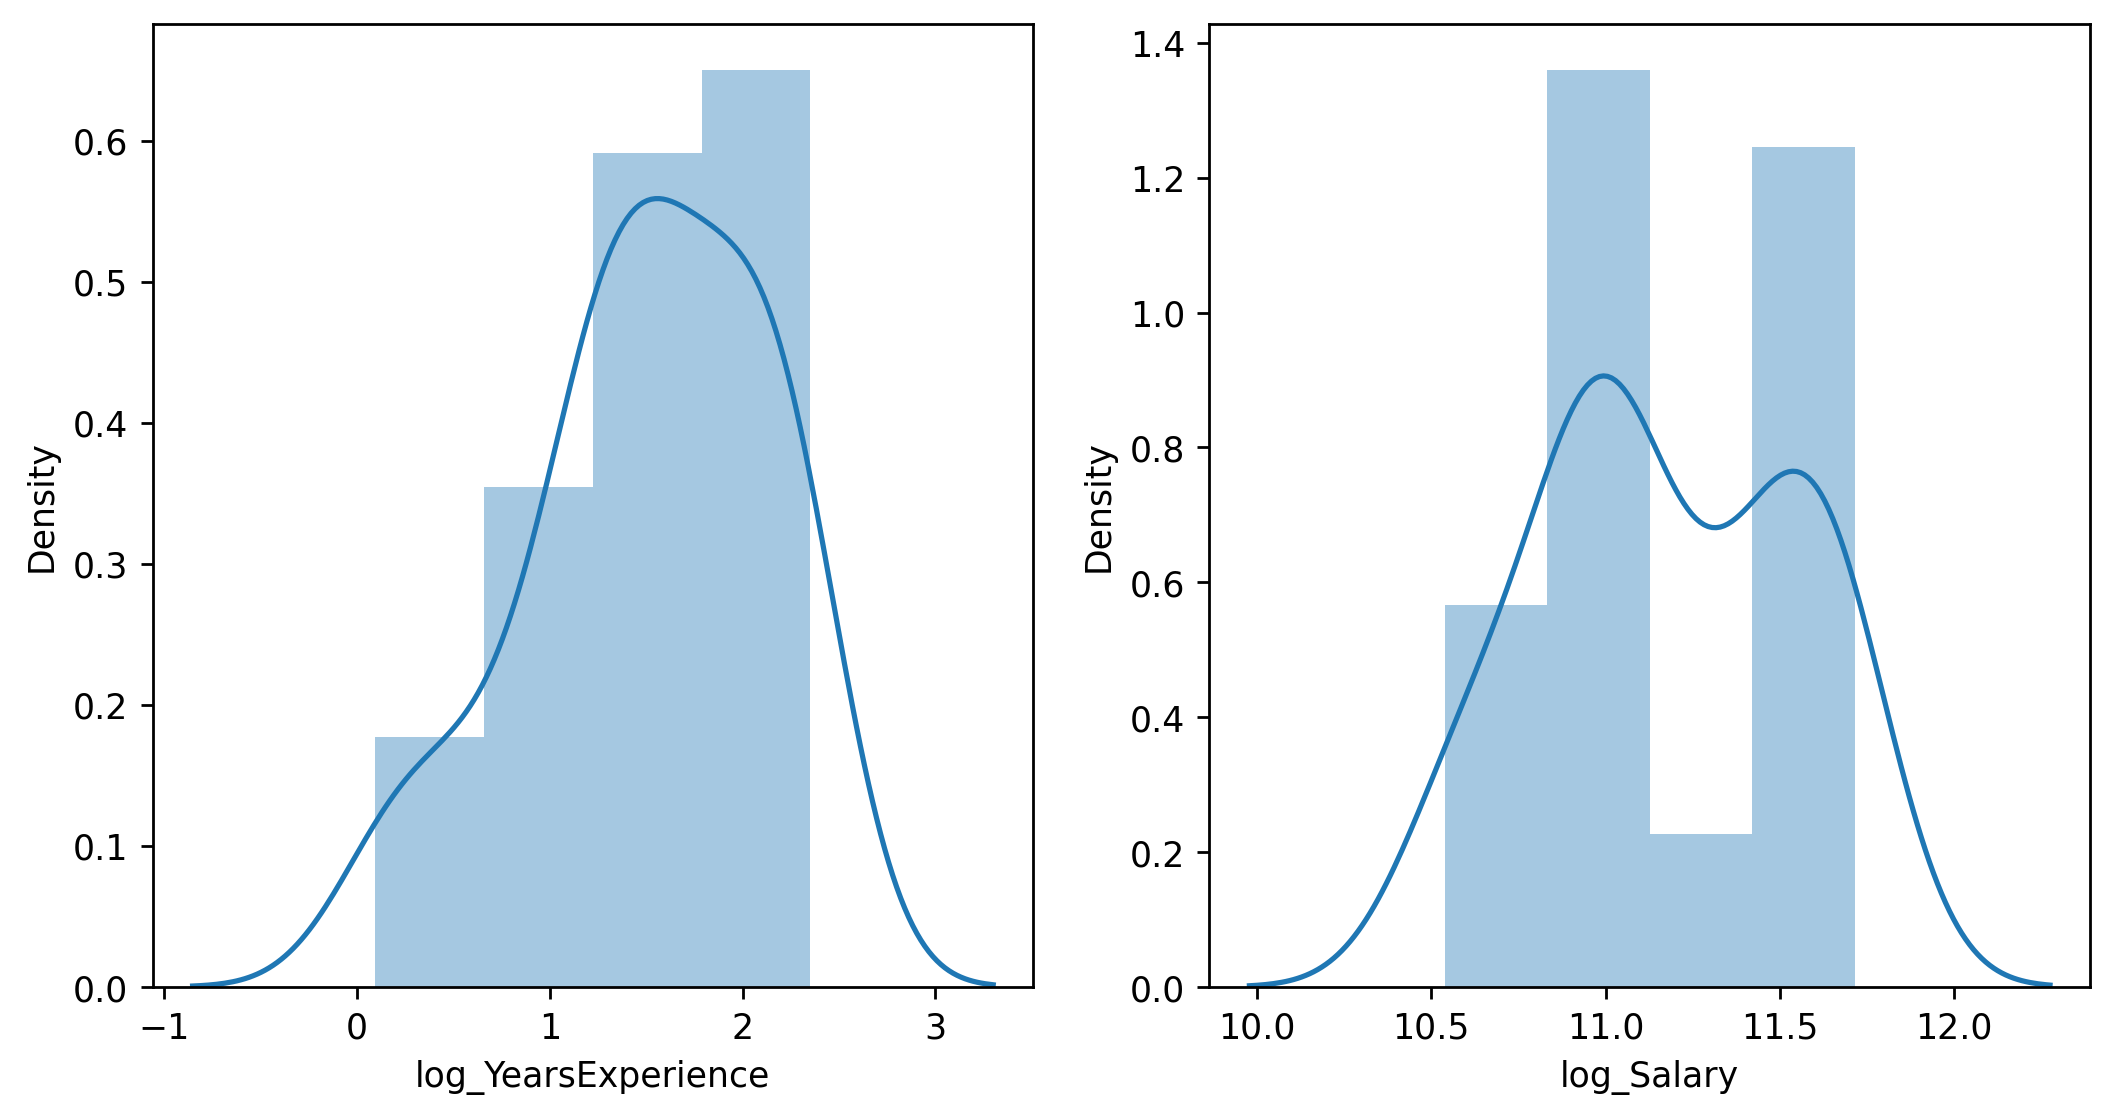

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['log_YearsExperience'])
plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])

Now we will build model on this log transformed dataset and check if we get better accuracy with transformed data.

In [22]:
log = smf.ols('log_Salary~log_YearsExperience', data=df).fit()

In [25]:
log.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [26]:
log.rsquared

0.9052150725817149

# Rsquared (i.e. accuracy of the model) didn't improved using the transformation
Therefore we finalize the untransformed model as our final model and go forward with prediction for new values.

In [27]:
final_model = model

In [17]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
newdf = pd.DataFrame({
    'YearsExperience' : [7,5,3,12,0,2.6]
})

In [30]:
newdf

,YearsExperience
0,7.0
1,5.0
2,3.0
3,12.0
4,0.0
5,2.6


In [31]:
final_model.predict(newdf)

0     91941.936449
1     73042.011806
2     54142.087163
3    139191.748056
4     25792.200199
5     50362.102234
dtype: float64

In [32]:
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
